## Exploratory Data Analysis

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA.


We shouldn't limit our EDA to these 10 questions. Let's be creative :).

In [3]:
import numpy as np
import pandas as pd
from datetime import datetime as dt
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import psycopg2
import datetime as dt
import requests

import os
API_key = os.environ.get('WWO_API_key')

In [4]:
params = {'user' : 'lhl_student',
          'password' : 'lhl_student',
          'host' : 'mid-term-project.ca2jkepgjpne.us-east-2.rds.amazonaws.com',
          'port' : '5432',
          'database' : 'mid_term_project'
         }

def open_connection(params):
    try:
        connection = psycopg2.connect(**params)
        cursor = connection.cursor()
        print("Connection was successful")
    except psycopg2.Error as e:
        print(f"The following error '{e}' occurred.")
        
    return connection, cursor
open_connection(params)

Connection was successful


(<connection object at 0x000001BBA078C948; dsn: 'user=lhl_student password=xxx dbname=mid_term_project host=mid-term-project.ca2jkepgjpne.us-east-2.rds.amazonaws.com port=5432', closed: 0>,
 <cursor object at 0x000001BBA07CCBA8; closed: 0>)

In [169]:
connection, cursor = open_connection(params)

query1 = 'SELECT * FROM flights LIMIT 1500;'
query2 = "SELECT column_name FROM information_schema.columns WHERE TABLE_NAME = 'flights';"

cursor.execute(query1)
data = cursor.fetchall()

cursor.execute(query2)
columns = cursor.fetchall()

connection.close()

Connection was successful


In [170]:
columns = [col[0] for col in columns]
columns

['fl_date',
 'mkt_unique_carrier',
 'branded_code_share',
 'mkt_carrier',
 'mkt_carrier_fl_num',
 'op_unique_carrier',
 'tail_num',
 'op_carrier_fl_num',
 'origin_airport_id',
 'origin',
 'origin_city_name',
 'dest_airport_id',
 'dest',
 'dest_city_name',
 'crs_dep_time',
 'dep_time',
 'dep_delay',
 'taxi_out',
 'wheels_off',
 'wheels_on',
 'taxi_in',
 'crs_arr_time',
 'arr_time',
 'arr_delay',
 'cancelled',
 'cancellation_code',
 'diverted',
 'dup',
 'crs_elapsed_time',
 'actual_elapsed_time',
 'air_time',
 'flights',
 'distance',
 'carrier_delay',
 'weather_delay',
 'nas_delay',
 'security_delay',
 'late_aircraft_delay',
 'first_dep_time',
 'total_add_gtime',
 'longest_add_gtime',
 'no_name']

In [171]:
df = pd.DataFrame(data, columns=columns)
df.dropna(subset=['arr_delay'], inplace=True)
df

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2018-04-10,WN,WN,WN,1704,WN,N777QC,1704,11292,DEN,...,1491.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
1,2018-04-10,WN,WN,WN,1818,WN,N466WN,1818,11292,DEN,...,1491.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
2,2018-04-10,WN,WN,WN,1897,WN,N263WN,1897,11292,DEN,...,1491.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
3,2018-04-10,WN,WN,WN,31,WN,N8526W,31,11292,DEN,...,1201.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
4,2018-04-10,WN,WN,WN,5532,WN,N421LV,5532,11292,DEN,...,1154.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,2018-04-10,AA,AA_CODESHARE,AA,5887,YV,N959LR,5887,13158,MAF,...,309.0,6.0,0.0,3.0,0.0,40.0,None,NaN,NaN,None
1496,2018-04-10,AA,AA_CODESHARE,AA,5888,YV,N955LR,5888,11140,CRP,...,354.0,0.0,0.0,2.0,0.0,67.0,None,NaN,NaN,None
1497,2018-04-10,AA,AA_CODESHARE,AA,5888,YV,N955LR,5888,11298,DFW,...,354.0,0.0,0.0,2.0,0.0,73.0,None,NaN,NaN,None
1498,2018-04-10,AA,AA_CODESHARE,AA,5889,YV,N935LR,5889,14107,PHX,...,369.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None


In [8]:
df.dtypes

fl_date                 object
mkt_unique_carrier      object
branded_code_share      object
mkt_carrier             object
mkt_carrier_fl_num       int64
op_unique_carrier       object
tail_num                object
op_carrier_fl_num        int64
origin_airport_id        int64
origin                  object
origin_city_name        object
dest_airport_id          int64
dest                    object
dest_city_name          object
crs_dep_time             int64
dep_time               float64
dep_delay              float64
taxi_out               float64
wheels_off             float64
wheels_on              float64
taxi_in                float64
crs_arr_time             int64
arr_time               float64
arr_delay              float64
cancelled              float64
cancellation_code       object
diverted               float64
dup                     object
crs_elapsed_time       float64
actual_elapsed_time    float64
air_time               float64
flights                float64
distance

In [9]:
df['arr_delay'][df['arr_delay']> 150]

199     158.0
317     936.0
410     195.0
411     168.0
534     527.0
563     182.0
637     163.0
661     890.0
799     660.0
872     161.0
874     169.0
877     247.0
896     243.0
922     328.0
934     151.0
941     199.0
944     219.0
960     337.0
973     231.0
985     258.0
996     275.0
1020    308.0
1037    234.0
1047    205.0
1051    157.0
1070    209.0
1131    375.0
1133    342.0
1172    220.0
1186    196.0
1193    695.0
1200    250.0
1205    210.0
1209    155.0
1218    513.0
1245    156.0
1256    240.0
1264    156.0
1306    227.0
1314    294.0
1323    324.0
1360    232.0
1397    257.0
1409    162.0
1415    237.0
1453    257.0
1459    265.0
Name: arr_delay, dtype: float64

#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

C:\Users\richl\anaconda3\envs\lighthouse\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='arr_delay', ylabel='Density'>

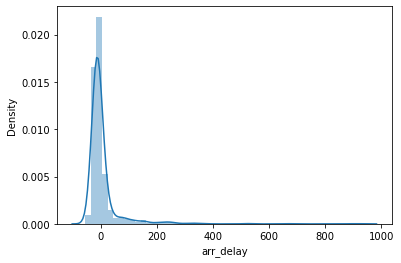

In [10]:
sns.distplot(df['arr_delay'])

In [11]:
stat,p = stats.shapiro(df['arr_delay'][df['arr_delay'] < 150])
stat, p

(0.7333697080612183, 1.1224400699241785e-42)

In [12]:
stats.trim_mean(df['arr_delay'], 0.20)

-9.475917431192661

### ^^^ The Distribution is not normal (without outliers)

#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

In [172]:
connection,cursor = open_connection(params)
print('working...')

months = [] # Will be a list of DataFrames!!       CAREFUL this takes a couple minutes to execute, and it makes quite a few requests of the server, try to run sparingly
i='00'
for mon in range(1,13):
    if mon < 10:
        i = '0' + str(mon)  # need to format single digits from '1' -> '01'    This can be changed but i forget offhand the SQL wildcard CHar for any OR NONE characters
    else:
        i = str(mon)
    query = f'''
    SELECT * FROM flights 
    WHERE fl_date LIKE '____-{i}%'
    ORDER BY random()
    LIMIT 300;
    '''
    cursor.execute(query)
    data = cursor.fetchall()
    month = pd.DataFrame(data, columns=columns)
    month.dropna(subset=['fl_date','dep_time'], inplace=True)
    months.append(month)
    
connection.close()
print("Connection closed, operation completed")

Connection was successful
working...
Connection closed, operation completed


In [173]:
months[0].head(10)

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2019-01-23,WN,WN,WN,761,WN,N220WN,761,14893,SMF,...,480.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
1,2019-01-10,AS,AS,AS,322,AS,N305AS,322,14747,SEA,...,696.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
2,2019-01-17,WN,WN,WN,1783,WN,N7819A,1783,11292,DEN,...,533.0,48.0,0.0,0.0,0.0,0.0,None,NaN,NaN,None
3,2019-01-03,AA,AA_CODESHARE,AA,5942,YV,N916FJ,5942,12217,HSV,...,603.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
4,2018-01-11,WN,WN,WN,1712,WN,N7845A,1712,11540,ELP,...,562.0,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,None
5,2018-01-19,AA,AA,AA,699,AA,N557UW,699,14100,PHL,...,2176.0,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,None
6,2019-01-04,AA,AA_CODESHARE,AA,3601,MQ,N680AE,3601,10469,AZO,...,122.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
7,2019-01-09,WN,WN,WN,549,WN,N926WN,549,11259,DAL,...,247.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
8,2018-01-28,NK,NK,NK,443,NK,N681NK,443,10821,BWI,...,925.0,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,None
9,2019-01-31,WN,WN,WN,642,WN,N493WN,642,10599,BHM,...,587.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None


C:\Users\richl\anaconda3\envs\lighthouse\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\richl\anaconda3\envs\lighthouse\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\richl\anaconda3\envs\lighthouse\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with

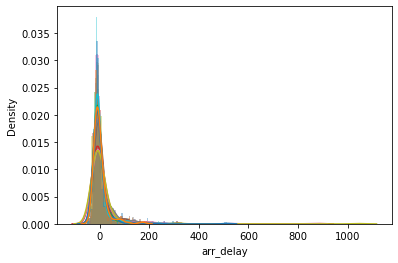

In [174]:
for month in months:
    sns.distplot(month['arr_delay'])
    

In [175]:
for i in range(12):
    print('month', i, 'mean:', stats.trim_mean(months[i]['arr_delay'], 0.20))  # trim_mean removes the N percent of either tails, in this case 20% to deal with outliers (then calculates mean)

print()  

for i in range(12):
    print('month', i, 'median', np.median(stats.trimboth(months[i]['arr_delay'], 0.20)))      # median must be called as np.median(data), so trim_both only performs a trim

month 0 mean: -5.636363636363637
month 1 mean: -5.694915254237288
month 2 mean: -6.1257142857142854
month 3 mean: -5.388888888888889
month 4 mean: -3.6222222222222222
month 5 mean: -1.7191011235955056
month 6 mean: -4.6353591160221
month 7 mean: -2.911111111111111
month 8 mean: -6.033519553072626
month 9 mean: -6.694915254237288
month 10 mean: -7.704545454545454
month 11 mean: -5.903409090909091

month 0 median -6.0
month 1 median -6.0
month 2 median -7.0
month 3 median -8.0
month 4 median -5.0
month 5 median -4.0
month 6 median -6.0
month 7 median -5.0
month 8 median -7.0
month 9 median -8.0
month 10 median -8.0
month 11 median -6.0


#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

In [176]:
import os
API_key = os.environ.get('WWO_API_key')  # Make Sure you make your own API key to try, if we share it will probably run out of daily limit too soon

In [177]:
month_df = months[0]
month_df

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2019-01-23,WN,WN,WN,761,WN,N220WN,761,14893,SMF,...,480.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
1,2019-01-10,AS,AS,AS,322,AS,N305AS,322,14747,SEA,...,696.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
2,2019-01-17,WN,WN,WN,1783,WN,N7819A,1783,11292,DEN,...,533.0,48.0,0.0,0.0,0.0,0.0,None,NaN,NaN,None
3,2019-01-03,AA,AA_CODESHARE,AA,5942,YV,N916FJ,5942,12217,HSV,...,603.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
4,2018-01-11,WN,WN,WN,1712,WN,N7845A,1712,11540,ELP,...,562.0,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,2019-01-25,UA,UA,UA,644,UA,N67812,644,10423,AUS,...,775.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None
296,2018-01-19,AS,AS,AS,29,AS,N428AS,29,13930,ORD,...,1721.0,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,None
297,2018-01-27,AA,AA_CODESHARE,AA,3727,MQ,N530EA,3727,14783,SGF,...,708.0,NaN,NaN,NaN,NaN,NaN,,NaN,NaN,None
298,2019-01-05,WN,WN,WN,4372,WN,N926WN,4372,15304,TPA,...,842.0,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,None


In [178]:
# Finds correct index for WWO json for the right 3 hour period, in order to find weather description

# parameters(time (h,m))   returns (index(int))
def decide_time(time):
    if time[:-2] == '':
        h = 0
    else:
        h = int(time[:-2])
    try:
        m = int(time[-2:])
    except:
        print("ERROR: m is", time[-2:], '!!!')
    print(h,m)
    if m > 30 & h != 23:  # average hour up or down, unless it rolls over to next day (past 2400)
        h+1
    if h >= 21:
        return 7
    elif h >= 18:
        return 6
    elif h >= 15:
        return 5
    elif h >= 12:
        return 4
    elif h >= 9:
        return 3
    elif h >= 6:
        return 2
    elif h >= 3:
        return 1
    else:
        return 0   # Probably the worst function I've ever wrote, don't know python well enough to make this concise (enumerate instead?)

In [179]:
def get_latlon(df):

    airports = pd.read_csv('airports.csv')  # found a database of airports, so with airport IATA code i can get the lat,lon coords for the actual weather around that airport
    IATA = df.loc[0]['origin']                                                 # not just the whole city. Link to the database: https://davidmegginson.github.io/ourairports-data/airports.csv
    latlon = airports[airports['iata_code']==IATA][['latitude_deg','longitude_deg']].values[0]

    return latlon

In [180]:
def get_montly_weathers(months):
    for df in months:
        dep_datetime = get_dep_datetime(df)
        lat,lon = get_latlon(df)

        url = f"http://api.worldweatheronline.com/premium/v1/weather.ashx?key={API_key}&q={lat},{lon}&num_of_days=1&format=json"
        data = requests.get(url).json()
        weather = data['data']['current_condition'][0]['weatherDesc'][0]['value']
        weather 

In [181]:
def get_weatherDesc(row):
    date, time = row[1].fl_date, str(row[1].dep_time)[:-2]
    print(date,time)
    lat,lon = get_latlon(df)
    time_cursor = decide_time(time)
    
    url = f"http://api.worldweatheronline.com/premium/v1/past-weather.ashx?key={API_key}&q={lat},{lon}&date={date}&num_of_days=1&format=json"
    data = requests.get(url).json()
    data

    weather = data['data']['weather'][0]['hourly'][time_cursor]['weatherDesc'][0]['value']
    return weather 

In [182]:
for i in range(len(months)):
    for row in months[i].head(10).iterrows():
        print(get_weatherDesc(row)) # ALMOST WORKS!!! Just need to remove nans from the columns, forgot about that

2019-01-23 2006
20 6
Partly cloudy
2019-01-10 1719
17 19
Sunny
2019-01-17 1253
12 53
Sunny
2019-01-03 1316
13 16
Sunny
2018-01-11 1206
12 6
Sunny
2018-01-19 2050
20 50
Clear
2019-01-04 559
5 59
Clear
2019-01-09 1557
15 57
Overcast
2018-01-28 1931
19 31
Clear
2019-01-31 1652
16 52
Partly cloudy
2019-02-16 603
6 3
Sunny
2018-02-01 1624
16 24
Patchy light snow
2019-02-02 1046
10 46
Sunny
2018-02-24 559
5 59
Light snow
2018-02-23 1355
13 55
Sunny
2019-02-24 1237
12 37
Sunny
2018-02-25 1530
15 30
Sunny
2018-02-17 1035
10 35
Sunny
2019-02-13 1033
10 33
Sunny
2019-02-25 1343
13 43
Sunny
2018-03-17 1050
10 50
Sunny
2019-03-11 605
6 5
Sunny
2018-03-06 1550
15 50
Sunny
2018-03-18 2012
20 12
Thundery outbreaks possible
2019-03-01 625
6 25
Sunny
2018-03-15 1009
10 9
Sunny
2018-03-10 617
6 17
Sunny
2019-03-14 1805
18 5
Clear
2018-03-29 2315
23 15
Clear
2019-03-21 854
8 54
Sunny
2019-04-02 1737
17 37
Partly cloudy
2019-04-02 1506
15 6
Partly cloudy
2018-04-27 1441
14 41
Sunny
2018-04-06 828
8 28
Par

In [167]:
months[2].head(10)

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2019-03-21,DL,DL_CODESHARE,DL,3381,9E,N8986B,3381,11433,DTW,...,98.0,NaN,NaN,NaN,NaN,NaN,None,None,None,None
1,2018-03-12,WN,WN,WN,1713,WN,N787SA,1713,11259,DAL,...,436.0,NaN,NaN,NaN,NaN,NaN,None,None,None,None
2,2018-03-23,AA,AA_CODESHARE,AA,5158,OH,N539EA,5158,10868,CAE,...,88.0,NaN,NaN,NaN,NaN,NaN,None,None,None,None
3,2019-03-04,AA,AA,AA,1544,AA,N342PM,1544,14893,SMF,...,1431.0,NaN,NaN,NaN,NaN,NaN,None,None,None,None
4,2019-03-28,AA,AA,AA,1017,AA,N973NN,1017,11057,CLT,...,599.0,NaN,NaN,NaN,NaN,NaN,None,None,None,None
5,2019-03-15,DL,DL_CODESHARE,DL,3470,9E,N931XJ,3470,11193,CVG,...,871.0,NaN,NaN,NaN,NaN,NaN,None,None,None,None
6,2018-03-11,WN,WN,WN,2658,WN,N8699A,2658,10821,BWI,...,587.0,NaN,NaN,NaN,NaN,NaN,None,None,None,None
7,2018-03-26,UA,UA_CODESHARE,UA,6275,YV,N88331,6275,15376,TUS,...,936.0,NaN,NaN,NaN,NaN,NaN,None,None,None,None
8,2019-03-12,AA,AA_CODESHARE,AA,4478,YX,N405YX,4478,12953,LGA,...,1147.0,7.0,0.0,8.0,0.0,0.0,None,None,None,None
9,2019-03-22,UA,UA,UA,1418,UA,N403UA,1418,11697,FLL,...,1182.0,NaN,NaN,NaN,NaN,NaN,None,None,None,None


#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

In [160]:
month_df['taxi_time'] = month_df['taxi_in'] + month_df['taxi_out']
month_df['taxi_time']

0      30.0
1      16.0
2      38.0
3      18.0
4      29.0
       ... 
295    15.0
296    38.0
297    16.0
298    16.0
299    25.0
Name: taxi_time, Length: 300, dtype: float64

C:\Users\richl\anaconda3\envs\lighthouse\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='taxi_time', ylabel='Density'>

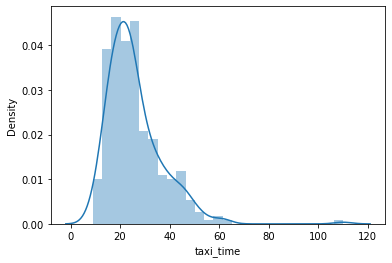

In [171]:
sns.distplot(month_df['taxi_time'])

In [95]:
lat, lon = get_latlon(df)
lat

42.212398529052734

#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

In [168]:
df

,fl_date,mkt_unique_carrier,branded_code_share,mkt_carrier,mkt_carrier_fl_num,op_unique_carrier,tail_num,op_carrier_fl_num,origin_airport_id,origin,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,first_dep_time,total_add_gtime,longest_add_gtime,no_name
0,2019-03-21,DL,DL_CODESHARE,DL,3381,9E,N8986B,3381,11433,DTW,...,98.0,NaN,NaN,NaN,NaN,NaN,None,None,None,None
1,2018-03-12,WN,WN,WN,1713,WN,N787SA,1713,11259,DAL,...,436.0,NaN,NaN,NaN,NaN,NaN,None,None,None,None
2,2018-03-23,AA,AA_CODESHARE,AA,5158,OH,N539EA,5158,10868,CAE,...,88.0,NaN,NaN,NaN,NaN,NaN,None,None,None,None
3,2019-03-04,AA,AA,AA,1544,AA,N342PM,1544,14893,SMF,...,1431.0,NaN,NaN,NaN,NaN,NaN,None,None,None,None
4,2019-03-28,AA,AA,AA,1017,AA,N973NN,1017,11057,CLT,...,599.0,NaN,NaN,NaN,NaN,NaN,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,2018-03-20,UA,UA_CODESHARE,UA,5411,OO,N119SY,5411,12892,LAX,...,370.0,7.0,0.0,0.0,0.0,12.0,None,None,None,None
296,2018-03-29,WN,WN,WN,6120,WN,N968WN,6120,15016,STL,...,814.0,NaN,NaN,NaN,NaN,NaN,None,None,None,None
297,2018-03-01,B6,B6,B6,305,B6,N594JB,305,11618,EWR,...,1065.0,77.0,0.0,0.0,0.0,0.0,None,None,None,None
298,2019-03-30,AS,AS,AS,946,AS,N264AK,946,14771,SFO,...,337.0,0.0,0.0,18.0,0.0,0.0,None,None,None,None


#### **Task 6**: How many states cover 50% of US air traffic? 

#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

#### **Task 9**: Find the top 10 the bussiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?